In [100]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [35]:
# Load the dataset
customer_data=pd.read_csv("C:/Users/sobha/Downloads/Customer Churn.csv")

In [36]:
# Viewing a sample of data
customer_data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2923,4402-FTBXC,Male,0,No,No,54,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,89.80,4667,No
4419,1045-LTCYT,Female,0,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),21.05,139.75,No
427,8734-DKSTZ,Female,0,Yes,Yes,10,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,85.95,858.6,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
6888,3191-CSNMG,Female,0,Yes,Yes,3,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.70,239.45,No


In [37]:
# Knowing the size of the data
customer_data.shape

(7043, 21)

In [38]:
# Viewing names of columns and data types of them

print(customer_data.columns)
customer_data.info()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   obj

In [39]:
# Mathematically viewing data

customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is categorial hence not required

50% of the customers have tenure less than 29 months whereas average monthlt charges are 64.76 but 25% pay more than 89.85 per month

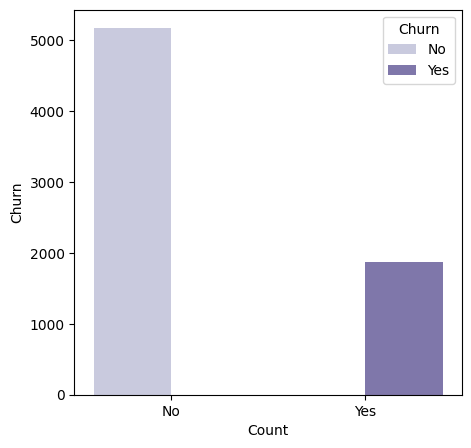

In [40]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Churn', data=customer_data, palette="Purples", hue="Churn")
plt.xlabel("Count")
plt.ylabel("Churn")
plt.show()

In [41]:
customer_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [42]:
customer_data['Churn'].value_counts()*100/len(customer_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

+ Data is divided in ratio of 73.5:26.5
+ Data is imbalanced

In [43]:
customer_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

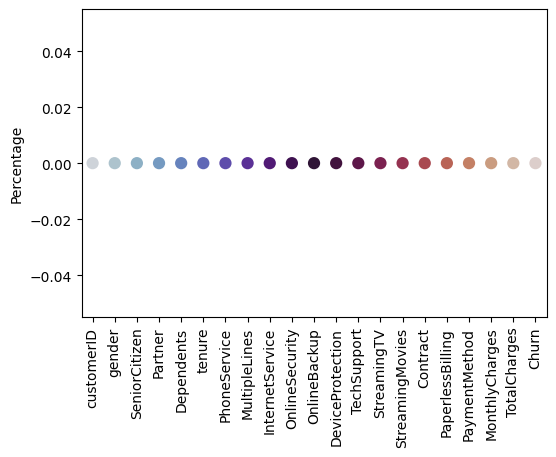

In [44]:
missing_data=pd.DataFrame(customer_data.isnull().sum()*100/customer_data.shape[0])
plt.figure(figsize=(6,4))
sns.pointplot(x=missing_data.index, y=0, data=missing_data, palette="twilight")
plt.xticks(rotation=90)
plt.title=("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

## Data Cleaning

In [45]:
customer_data["TotalCharges"]=pd.to_numeric(customer_data["TotalCharges"], errors='coerce')
customer_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [46]:
customer_data.loc[customer_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the percentage of missing record is very low, it is safe to drop those rows

In [47]:
# Removing missing value
customer_data.dropna(how='any', inplace=True)
customer_data.shape

(7032, 21)

In [48]:
customer_data['tenure'].max() #72

72

In [49]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
customer_data['tenure_group'] = pd.cut(customer_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [50]:
customer_data["tenure_group"].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [51]:
# dropping columns CustomerID and tenure
customer_data.drop(columns=["customerID"], inplace=True)

In [52]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   object  
 6   MultipleLines     7032 non-null   object  
 7   InternetService   7032 non-null   object  
 8   OnlineSecurity    7032 non-null   object  
 9   OnlineBackup      7032 non-null   object  
 10  DeviceProtection  7032 non-null   object  
 11  TechSupport       7032 non-null   object  
 12  StreamingTV       7032 non-null   object  
 13  StreamingMovies   7032 non-null   object  
 14  Contract          7032 non-null   object  
 15  PaperlessBilling  7032 non-null   object  
 16  PaymentMethod     7032 non-nu

## Exploratory Data Analysis

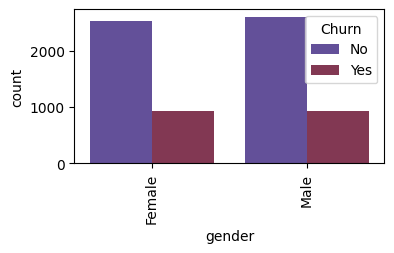

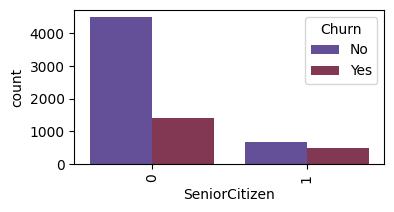

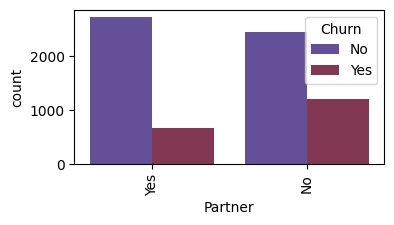

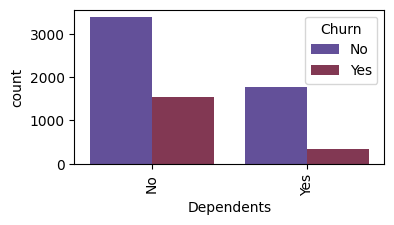

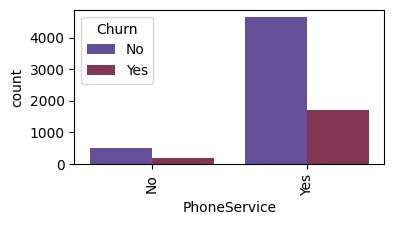

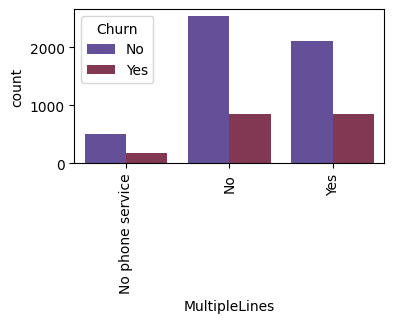

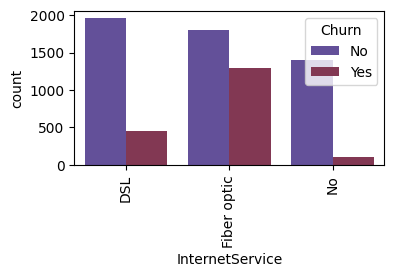

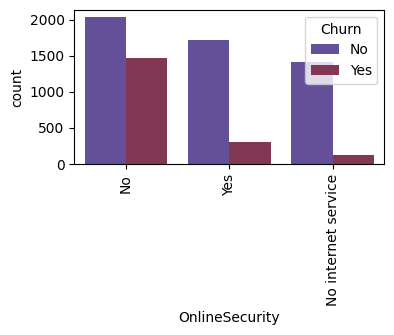

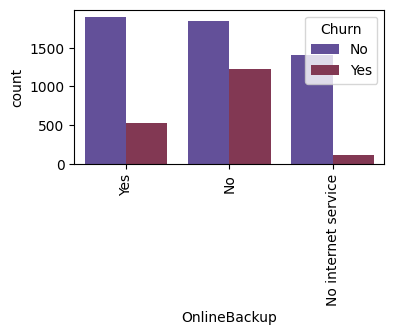

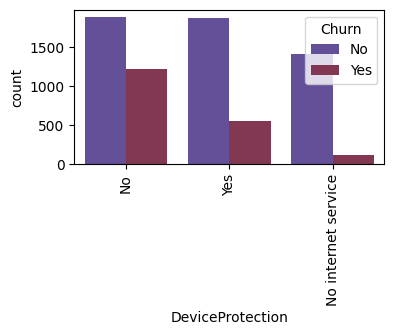

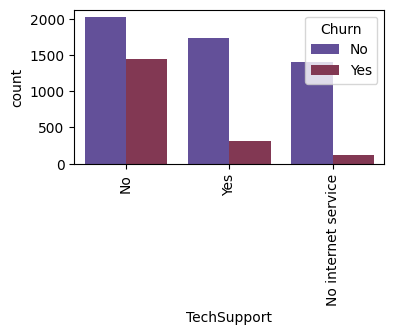

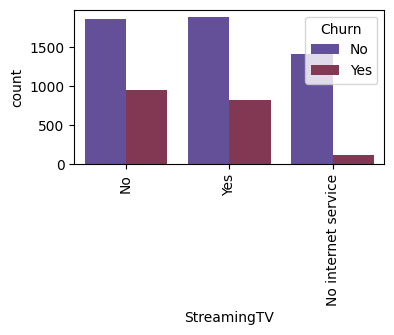

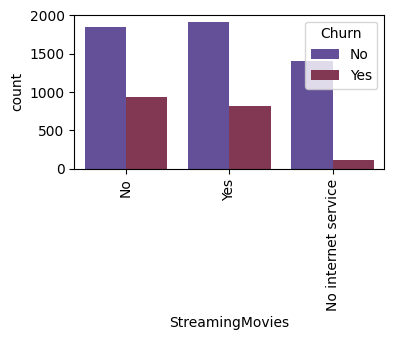

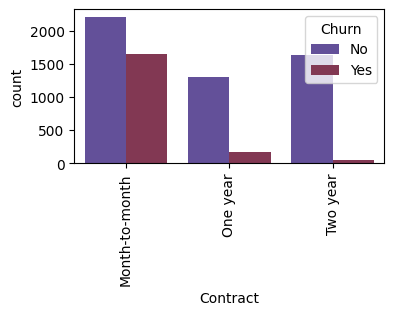

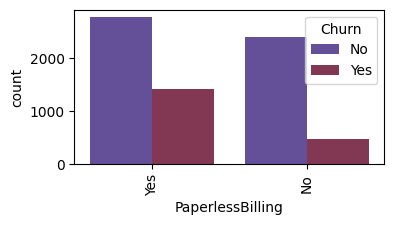

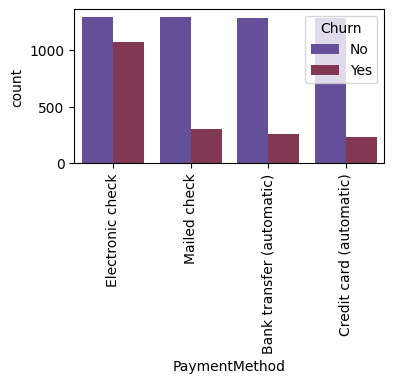

C:\Users\sobha\pp\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\sobha\pp\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


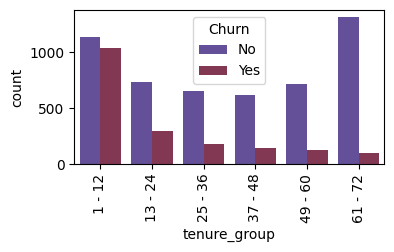

In [53]:
copy_data=customer_data.copy()

for i, p in enumerate(copy_data.drop(columns=["Churn", "TotalCharges", "MonthlyCharges", "tenure"])):
    plt.figure(i, figsize=(4, 2))
    sns.countplot(x=p, data=customer_data, palette="twilight", hue="Churn")
    plt.xticks(rotation=90)
    plt.show()

In [54]:
for i in ["Churn", 'Partner', "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"]:
    customer_data[i] = customer_data[i].apply(lambda x: 1 if x == 'Yes' else 0)

customer_data["gender_female"] = customer_data["gender"].apply(lambda x: 1 if x == 'Female' else 0)
customer_data.drop(columns=["gender"], inplace=True)

In [55]:
customer_data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,gender_female
0,0,1,0,1,0,0,DSL,0,1,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1 - 12,1
1,0,0,0,34,1,0,DSL,1,0,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,25 - 36,0
2,0,0,0,2,1,0,DSL,1,1,0,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1 - 12,0
3,0,0,0,45,0,0,DSL,1,0,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,37 - 48,0
4,0,0,0,2,1,0,Fiber optic,0,0,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1 - 12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,DSL,1,0,1,...,1,1,One year,1,Mailed check,84.80,1990.50,0,13 - 24,0
7039,0,1,1,72,1,1,Fiber optic,0,1,1,...,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,61 - 72,1
7040,0,1,1,11,0,0,DSL,1,0,0,...,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,1 - 12,1
7041,1,1,0,4,1,1,Fiber optic,0,0,0,...,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,1 - 12,0


In [56]:
for i in ["Churn", 'Partner', "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"]:
    print(customer_data[i].value_counts())
    print()

Churn
0    5163
1    1869
Name: count, dtype: int64

Partner
0    3639
1    3393
Name: count, dtype: int64

Dependents
0    4933
1    2099
Name: count, dtype: int64

PhoneService
1    6352
0     680
Name: count, dtype: int64

MultipleLines
0    4065
1    2967
Name: count, dtype: int64

OnlineSecurity
0    5017
1    2015
Name: count, dtype: int64

OnlineBackup
0    4607
1    2425
Name: count, dtype: int64

DeviceProtection
0    4614
1    2418
Name: count, dtype: int64

TechSupport
0    4992
1    2040
Name: count, dtype: int64

StreamingTV
0    4329
1    2703
Name: count, dtype: int64

StreamingMovies
0    4301
1    2731
Name: count, dtype: int64

PaperlessBilling
1    4168
0    2864
Name: count, dtype: int64



In [57]:
customer_data.sample(5)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,gender_female
3605,0,0,0,34,1,0,DSL,0,1,0,...,0,0,Month-to-month,1,Electronic check,49.80,1734.20,0,25 - 36,0
5162,0,0,1,8,1,0,No,0,0,0,...,0,0,Month-to-month,0,Bank transfer (automatic),19.45,159.20,0,1 - 12,0
3153,0,0,0,23,1,1,DSL,1,0,0,...,0,0,Month-to-month,0,Electronic check,54.40,1249.25,0,13 - 24,1
4083,1,1,0,68,1,1,Fiber optic,0,1,0,...,1,1,Month-to-month,1,Electronic check,100.20,6851.65,1,61 - 72,1
2706,0,1,0,2,1,0,Fiber optic,0,0,1,...,0,0,Month-to-month,0,Electronic check,76.40,151.80,1,1 - 12,0


In [58]:
# Converting categorical variables into numerical ones
customer_data_dummies = pd.get_dummies(customer_data, dtype=int)
customer_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   MultipleLines                            7032 non-null   int64  
 6   OnlineSecurity                           7032 non-null   int64  
 7   OnlineBackup                             7032 non-null   int64  
 8   DeviceProtection                         7032 non-null   int64  
 9   TechSupport                              7032 non-null   int64  
 10  StreamingTV                              7032 non-nul

#### Insights:
+  Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

In [59]:
customer_data_dummies.corr()["Churn"]

SeniorCitizen                              0.150541
Partner                                   -0.149982
Dependents                                -0.163128
tenure                                    -0.354049
PhoneService                               0.011691
MultipleLines                              0.040033
OnlineSecurity                            -0.171270
OnlineBackup                              -0.082307
DeviceProtection                          -0.066193
TechSupport                               -0.164716
StreamingTV                                0.063254
StreamingMovies                            0.060860
PaperlessBilling                           0.191454
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
gender_female                              0.008545
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetServ

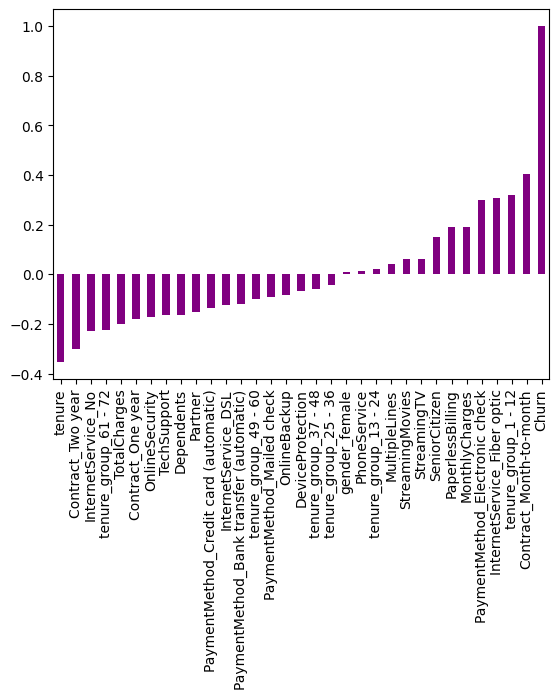

<Figure size 2000x400 with 0 Axes>

In [60]:
customer_data_dummies.corr()["Churn"].sort_values().plot(kind="bar", color="Purple")
plt.xticks(rotation=90)
plt.figure(figsize=(20,4))

plt.show()

### Insights:

+ HIGH Churn seen in case of Contract_Month-to-month, tenure_group_1 - 12, PaymentMethod_Electronic check, InternetService_Fiber optic and Contract_Two year

+ LOW Churn is seens in case of InternetService_No, tenure_group_61 - 72 and TotalCharges

+ Factors like Gender, Availability of PhoneService and that of multiple lines have alomost NO impact on Churn

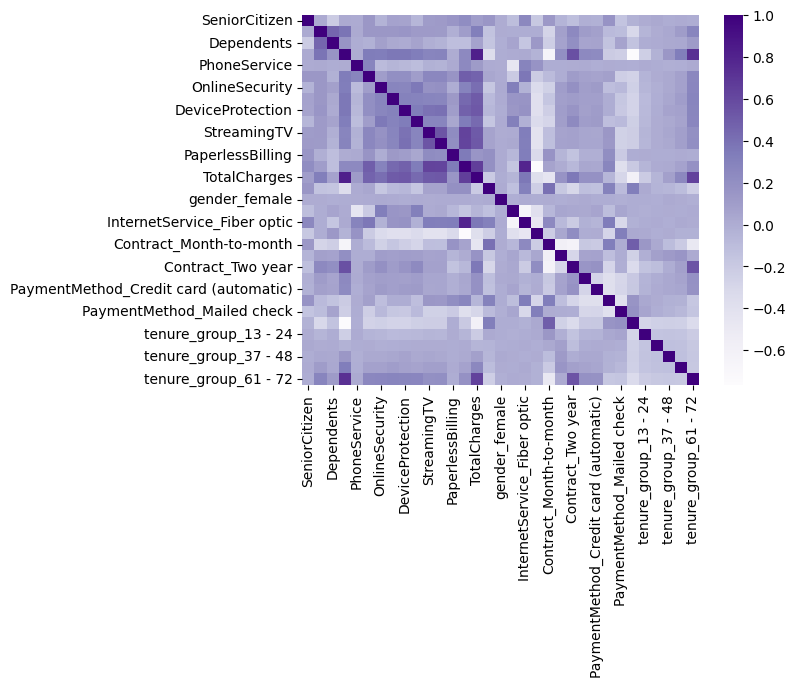

In [61]:
sns.heatmap(customer_data_dummies.corr(), cmap="Purples")
plt.show()

## Bivariate Analysis

#### Relationship b|w MonthlyCharges and TotalCharges

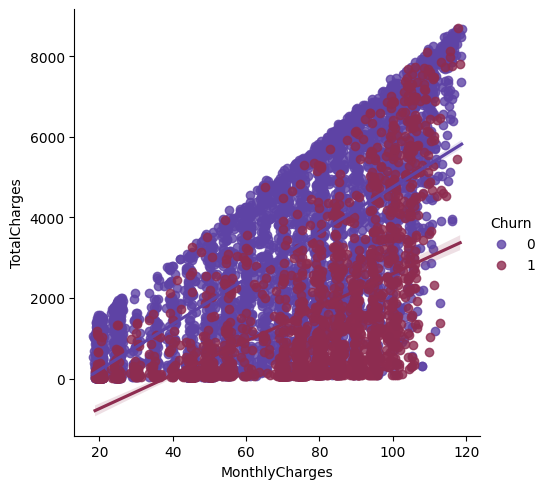

<Figure size 300x300 with 0 Axes>

In [62]:
sns.lmplot(data=customer_data_dummies, x='MonthlyCharges', y='TotalCharges', hue="Churn", palette="twilight")
plt.figure(i, figsize=(3, 3))
plt.show()

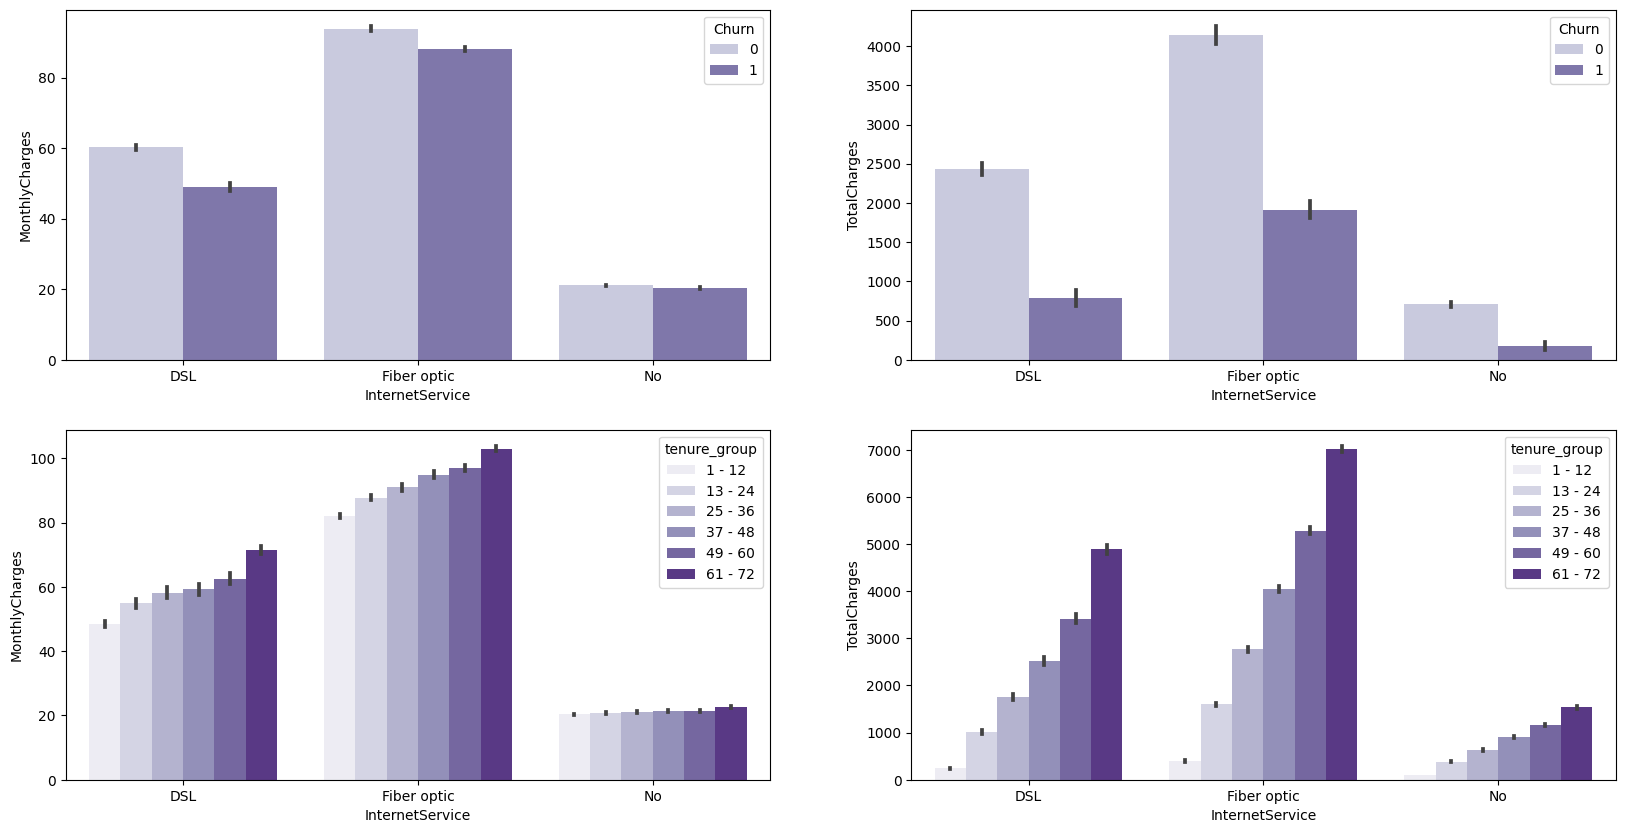

In [63]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.barplot(y="MonthlyCharges", x="InternetService", data=customer_data, palette="Purples", hue="Churn")
plt.subplot(2, 2, 2)
sns.barplot(y="TotalCharges", x="InternetService", data=customer_data, palette="Purples", hue="Churn")
plt.subplot(2, 2, 3)
sns.barplot(y="MonthlyCharges", x="InternetService", data=customer_data, palette="Purples", hue="tenure_group")
plt.subplot(2, 2, 4)
sns.barplot(y="TotalCharges", x="InternetService", data=customer_data, palette="Purples", hue="tenure_group")
plt.show()

C:\Users\sobha\pp\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\sobha\pp\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\sobha\pp\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.

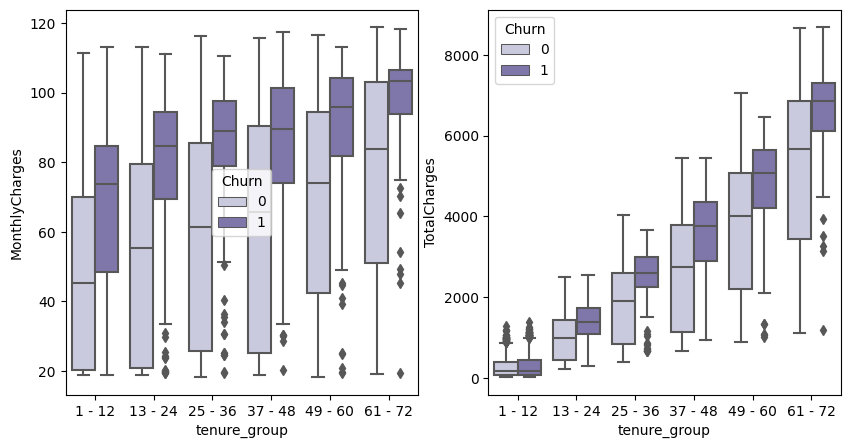

In [64]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y="MonthlyCharges", x="tenure_group", data=customer_data, palette="Purples", hue="Churn")

plt.subplot(1, 2, 2)
sns.boxplot(y="TotalCharges", x="tenure_group", data=customer_data, palette="Purples", hue="Churn")
plt.show()

C:\Users\sobha\AppData\Local\Temp\ipykernel_3928\1056349927.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[customer_data["Churn"]==0]["tenure"], color="pink")
C:\Users\sobha\pp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sobha\AppData\Local\Temp\ipykernel_3928\1056349927.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a fig

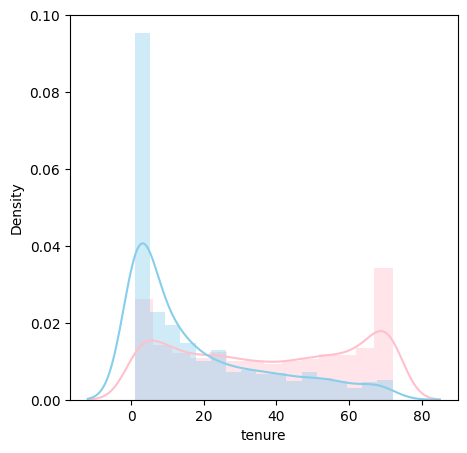

In [65]:
plt.figure(figsize=(5, 5))

sns.distplot(customer_data[customer_data["Churn"]==0]["tenure"], color="pink")
sns.distplot(customer_data[customer_data["Churn"]==1]["tenure"], color="skyblue")

plt.show()

In [66]:
customer_data['AvgChargesPerMonth'] = customer_data['TotalCharges'] / customer_data['tenure'].replace(0, 1)

# Is long-term customer
customer_data['IsLongTermCustomer'] = (customer_data['tenure'] > 12).astype(int)

# Total subscribed services
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']
customer_data[service_cols] = customer_data[service_cols].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
customer_data['TotalServices'] = customer_data[service_cols].sum(axis=1)

In [79]:
customer_data = pd.get_dummies(customer_data, drop_first=True)

# Model Training

In [80]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [81]:
x=customer_data_dummies.drop("Churn", axis=1)
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,34,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,2,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,1,1,72,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,1,1,11,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7041,1,1,0,4,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [82]:
y=customer_data_dummies["Churn"]

### Train Test Split

In [83]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [102]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Linear Regression Model

In [103]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [104]:
clf.fit(x_train, y_train)

C:\Users\sobha\pp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8194740582800284

In [107]:
import pickle

In [108]:
pickle.dump(clf, open('churn_pred_model.pkl', 'wb'))

In [109]:
load_model = pickle.load(open('churn_pred_model.pkl', 'rb'))

In [110]:
model_score = load_model.score(x_test, y_test)
model_score

0.8194740582800284

In [111]:
y_pred = load_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[939  95]
 [159 214]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1034
           1       0.69      0.57      0.63       373

    accuracy                           0.82      1407
   macro avg       0.77      0.74      0.75      1407
weighted avg       0.81      0.82      0.81      1407

Accuracy: 0.8194740582800284


In [112]:
def predict_churn(input_dict, model, scaler, X_columns):
    
    df = pd.DataFrame([input_dict])

    service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies']
    df[service_cols] = df[service_cols].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
    df['AvgChargesPerMonth'] = df['TotalCharges'] / df['tenure'].replace(0, 1)
    df['IsLongTermCustomer'] = (df['tenure'] > 12).astype(int)
    df['TotalServices'] = df[service_cols].sum(axis=1)

    # One-hot encoding
    df_encoded = pd.get_dummies(df, drop_first=True)
    df_encoded = df_encoded.reindex(columns=X_columns, fill_value=0)

    # Scale the input features
    df_scaled = scaler.transform(df_encoded)

    # Predict
    result = model.predict(df_scaled)[0]

    # Return prediction
    return "Churn" if result == 1 else "No Churn"


In [113]:
new_customer = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 5,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 75.5,
    'TotalCharges': 377.5
}
new_df = pd.DataFrame([new_customer])


In [115]:
output = predict_churn(new_customer, load_model, scaler, x_train.columns)
print("Prediction:", output)

Prediction: Churn


C:\Users\sobha\pp\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
